<h3>Interaction plots

<h3> Import Libraries

In [1]:
from functools import partial
import os
import pandas as pd

import json
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pickle

from new_plot import *
set_things()
set_font(size=20, family='Arial', weight='normal')
from sklearn.model_selection import train_test_split

from shap_tools import *

<h3> Reading property data

annealing


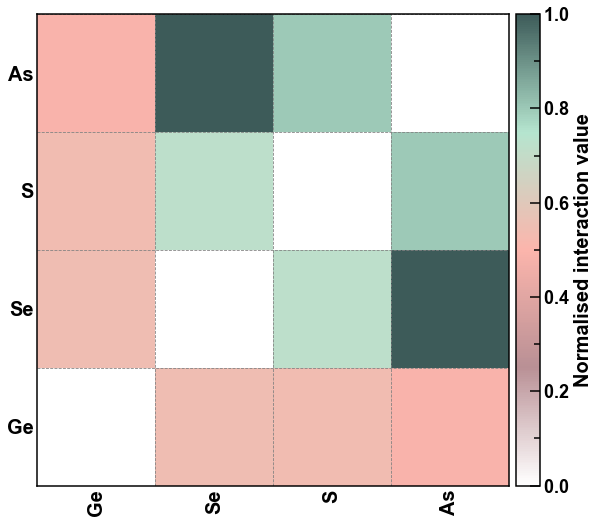

BulkModulus


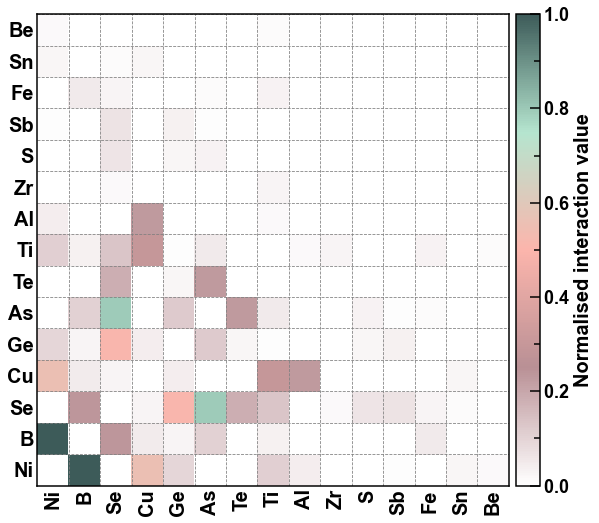

Density


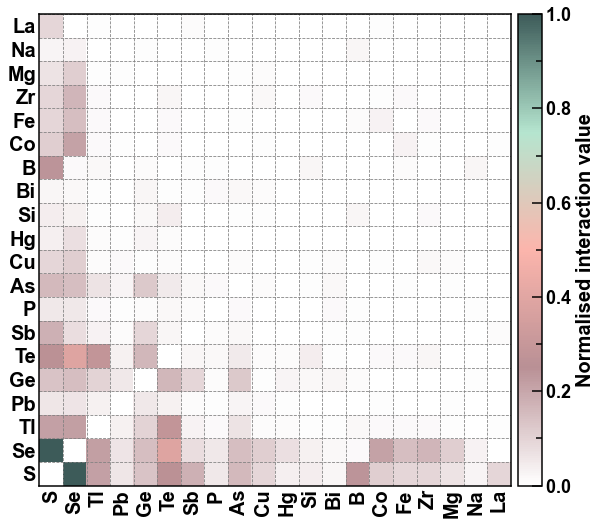

Littleton


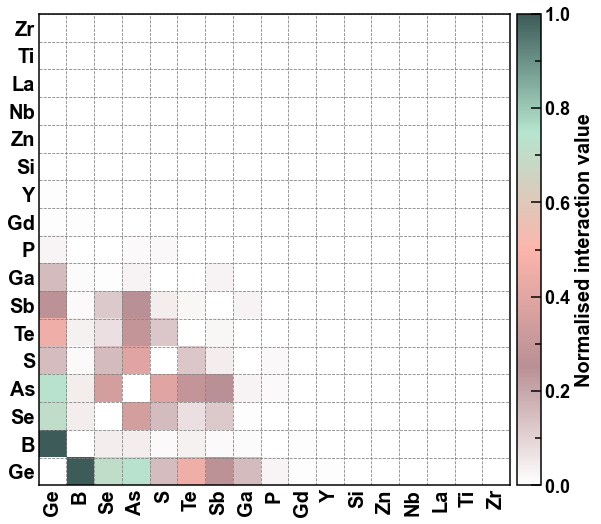

ND


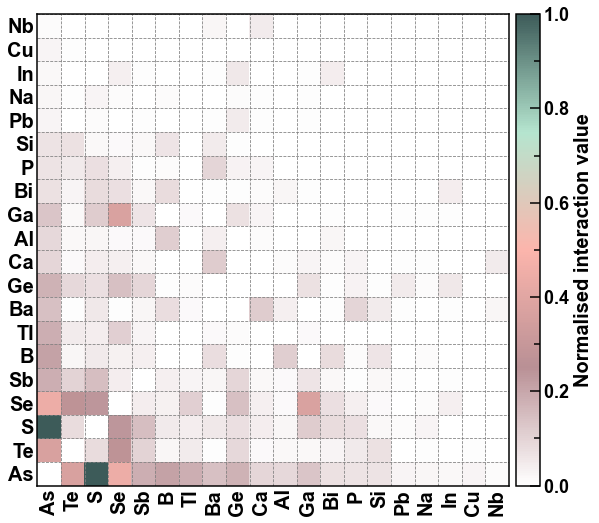

Shear_modulus


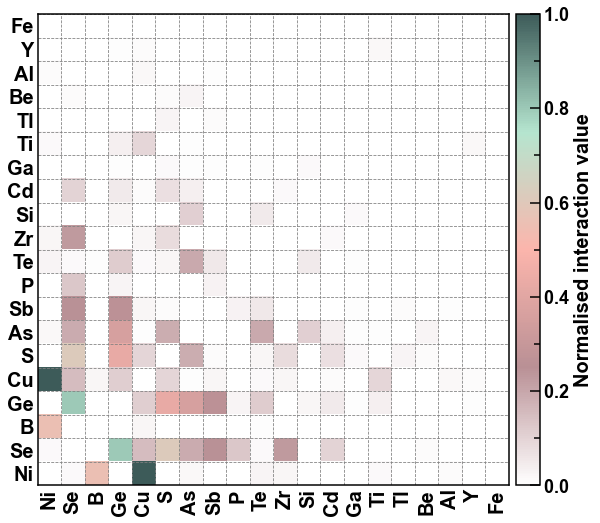

softening


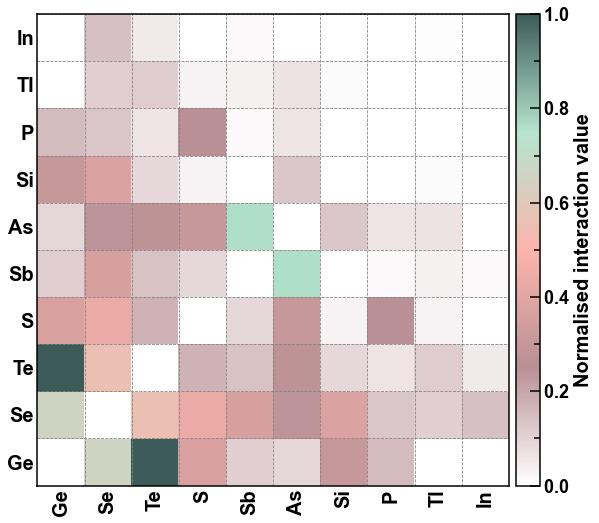

TEC


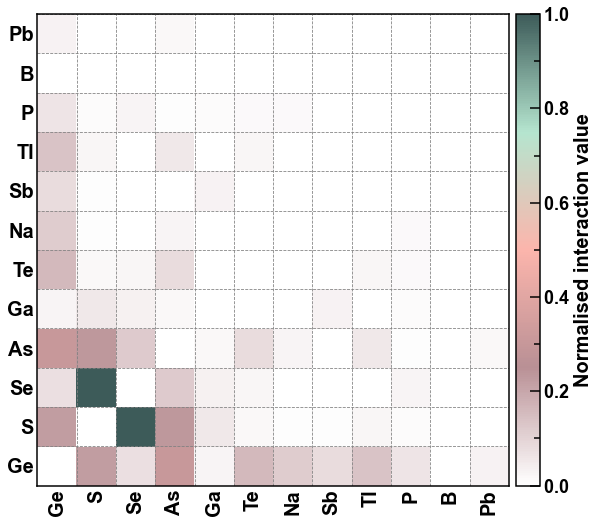

TG


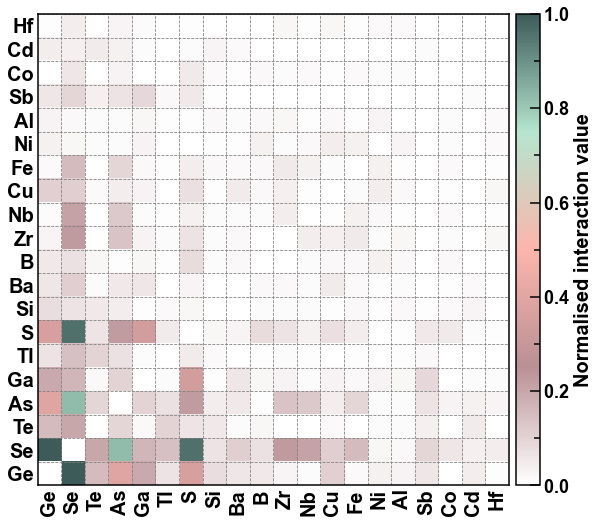

TLiq


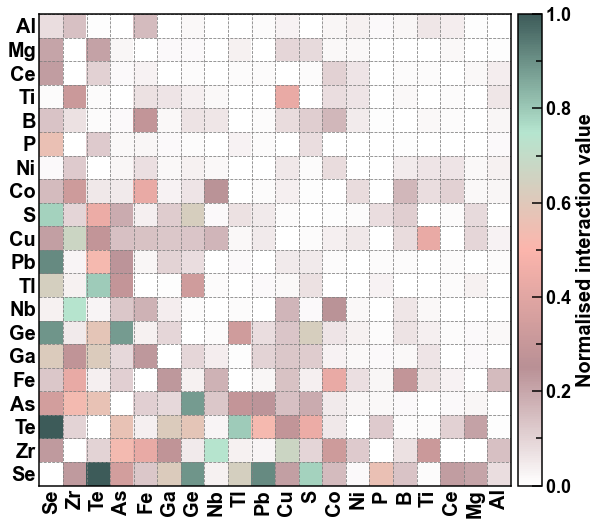

YM


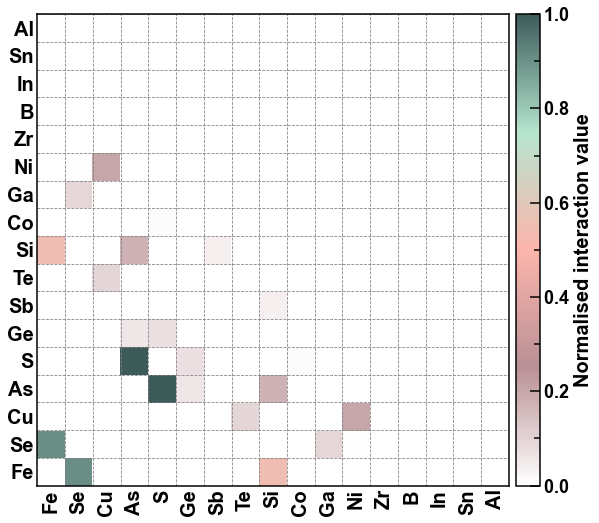

Hardness_RT


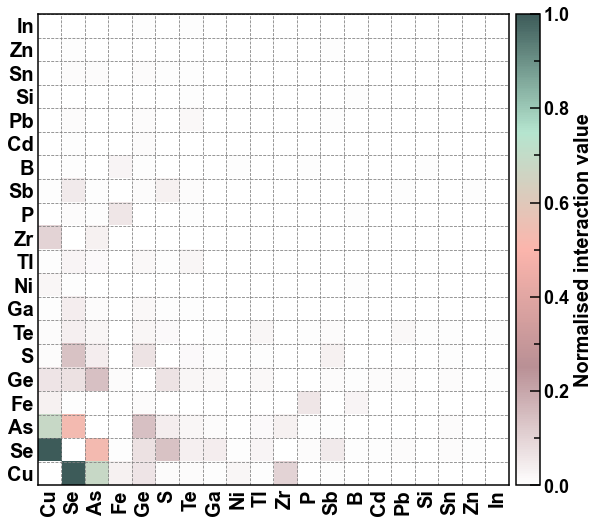

In [6]:
b = ['annealing', 'BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT']

for prop in b: 
    
    propfilename = prop

    propfilename =  "/new_data3/" + prop + ".csv"

    df = pd.read_csv(propfilename)
    data = df.values
    X_features = data[:,0:-1]
    Y_properties = data[:,-1]

    sa = df.columns.values.tolist()
    sa.remove(prop)
    a10 = sa

    X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_properties,test_size=0.2, random_state=42)

    np.savetxt('00_Pipeline_P1_Node_train_test_split_train_split_X.csv', X_train, delimiter = ",")
    np.savetxt('00_Pipeline_P1_Node_train_test_split_test_split_X.csv', X_test, delimiter = ",")
    np.savetxt('00_Pipeline_P1_Node_train_test_split_train_split_y.csv', Y_train, delimiter = ",")
    np.savetxt('00_Pipeline_P1_Node_train_test_split_test_split_y.csv', Y_test, delimiter = ",")

    xtrain='00_Pipeline_P1_Node_train_test_split_train_split_X.csv'
    xtest='00_Pipeline_P1_Node_train_test_split_test_split_X.csv'

    ytrain='00_Pipeline_P1_Node_train_test_split_train_split_y.csv'
    ytest='00_Pipeline_P1_Node_train_test_split_test_split_y.csv'

    def lo(file):

        """
        folder=path where input files are stored
        file=name of file to be read

        """
        #path = os.path.join(folder,file)
        df = pd.read_csv(file)
        return df

    dxtrain = lo(xtrain)
    dytrain = lo(ytrain)

    dxtest = lo(xtest)
    dytest = lo(ytest)
    print(prop)

    # order of represents based on decreasing order absolute value of SHAP interaction values
    if prop == 'TG': 
        descending = ['Ge', 'Se', 'Te', 'As', 'Ga', 'Tl', 'S', 'Si', 'Ba', 'B', 'Zr', 'Nb', 'Cu', 'Fe', 'Ni', 'Al', 'Sb', 'Co', 'Cd', 'Hf', 'Sn', 'Mg', 'P', 'In', 'La', 'Pb', 'Bi', 'Na', 'Ce', 'Cr', 'C', 'Ti', 'Sr', 'Li', 'Gd', 'Ca', 'Ta', 'Y', 'Dy', 'Mo', 'Zn', 'K', 'Nd', 'Hg', 'Be', 'Pr', 'Er', 'Ho', 'Mn', 'Tb', 'W']
    if prop == 'YM':
        descending = ['Fe', 'Se', 'Cu', 'As', 'S', 'Ge', 'Sb', 'Te', 'Si', 'Co', 'Ga', 'Ni', 'Zr', 'B', 'In', 'Sn', 'Al']
    if prop == 'Shear_modulus':
        descending = ['Ni', 'Se', 'B', 'Ge', 'Cu', 'S', 'As', 'Sb', 'P', 'Te', 'Zr', 'Si', 'Cd', 'Ga', 'Ti', 'Tl', 'Be', 'Al', 'Y', 'Fe', 'Sn']
    if prop == 'ND':
        descending = ['As', 'Te', 'S', 'Se', 'Sb', 'B', 'Tl', 'Ba', 'Ge', 'Ca', 'Al', 'Ga', 'Bi', 'P', 'Si', 'Pb', 'Na', 'In', 'Cu', 'Nb', 'Mg', 'K', 'Gd', 'Sn', 'La', 'Ti', 'Li', 'Zn', 'Sr', 'Ta', 'W', 'Y', 'Zr']
    if prop == 'Hardness_RT':
        descending = ['Cu', 'Se', 'As', 'Fe', 'Ge', 'S', 'Te', 'Ga', 'Ni', 'Tl', 'Zr', 'P', 'Sb', 'B', 'Cd', 'Pb', 'Si', 'Sn', 'Zn', 'In', 'Ba', 'Bi', 'La', 'Al', 'Ti', 'C', 'Hg', 'Ho', 'Y']
    if prop == 'BulkModulus':
        descending = ['Ni', 'B', 'Se', 'Cu', 'Ge', 'As', 'Te', 'Ti', 'Al', 'Zr', 'S', 'Sb', 'Fe', 'Sn', 'Be']
    if prop == 'annealing': 
        descending = ['Ge', 'Se', 'S', 'As']
    if prop == 'softening': 
        descending = ['Ge', 'Se', 'Te', 'S', 'Sb', 'As', 'Si', 'P', 'Tl', 'In']
    if prop == 'TEC':
        descending = ['Ge', 'S', 'Se', 'As', 'Ga', 'Te', 'Na', 'Sb', 'Tl', 'P', 'B', 'Pb']
    if prop == 'TLiq':
        descending = ['Se', 'Zr', 'Te', 'As', 'Fe', 'Ga', 'Ge', 'Nb', 'Tl', 'Pb', 'Cu', 'S', 'Co', 'Ni', 'P', 'B', 'Ti', 'Ce', 'Mg', 'Al', 'Sn', 'Ta', 'Nd', 'La', 'Sb', 'Bi', 'Ba', 'Sr', 'Ca', 'Cr', 'Si', 'Hf', 'C', 'Zn', 'Gd', 'Na', 'Y', 'In', 'W', 'Li', 'Mo', 'Er']
    if prop == 'Littleton': 
        descending = ['Ge', 'B', 'Se', 'As', 'S', 'Te', 'Sb', 'Ga', 'P', 'Gd', 'Y', 'Si', 'Zn', 'Nb', 'La', 'Ti', 'Zr']
    if prop == 'Density':
        descending = ['S', 'Se', 'Tl', 'Pb', 'Ge', 'Te', 'Sb', 'P', 'As', 'Cu', 'Hg', 'Si', 'Bi', 'B', 'Co', 'Fe', 'Zr', 'Mg', 'Na', 'La', 'Cd', 'Sn', 'Ga', 'Ca', 'In', 'Al', 'Nd', 'Ni', 'Ba', 'Li', 'K', 'Nb', 'Gd', 'Be', 'Er', 'Mn', 'Zn', 'Pr', 'Y', 'Ho', 'Cr', 'Ti', 'Sr', 'W']

    folder_name = ''
    
    colors = ["white", "#B99095", "#FCB5AC","#B5E5CF", "#3D5B59"]#"#FF004F"]
    nodes = [0.0,0.25, 0.5, 0.75, 1.0]
    cmap1 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

    y = dytrain
    X = dxtrain
    X.columns =X.columns.tolist()
    top=20
    if top>X.shape[1]:
        top = X.shape[1]
    #ivs_file = "IVS/{}_ivs.pkl".format(prop)
    ivs = pickle.load(open('SHAP/Shap_values/' + prop+'_ivs.pkl', 'rb'))
    mean = 0#np.mean(y)
    std = 1#np.std(y)
    N = ivs.shape[0]
    X = X.iloc[:N]
    y = y[:N]

    vs = ivs.sum(2)

    IVS = np.abs(ivs).mean(0)
    IVS[np.diag_indices_from(IVS)] = 0  # diagonal matrix zero 
    VS = np.abs(ivs.sum(2)).mean(0)

    mask_top = np.argsort(np.abs(VS[:]))[::-1][:top] 

    data_ = IVS[:,:]
    data_ = data_[:, mask_top]
    data_ = data_[mask_top, :]
    data_ /= data_.max()
    #print(IVS)
    set_tick('off')
    fig, ax = plt.subplots(figsize=[9,9])
    # plt.title(prop_names[prop], verticalalignment='bottom')
    cb = plt.imshow(data_, cmap=cmap1, vmin=0)
    plt.grid('on', color="gray", ls="--", which="minor", alpha=1.)
    #decending--> List of elements with descending values
    if len(descending)>=20:
        descending = descending[:20]
    comps =[i for i in descending]
   
    yticks(range(len(data_)), labels=comps, size=20)
    xticks(range(len(data_)), labels=comps, size=20, rotation=90)

    # yticks(range(len(data_)), labels=comps[:-1], size=12)
    # xticks(range(len(data_)), labels=comps[:-1], size=12, rotation=90)



    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(cb, cax=cax, label="Normalised interaction value")
    #ax.set_title(prop)
    plt.savefig('interaction_plots_new/' + prop+'_interaction_plot.png', dpi=1200)
    plt.show()
    # save2file("IVS/{}_ivs.pfig".format(prop), fig)
   
    